In [13]:
import pandas as pd
import numpy as np

from glob import glob
from tqdm.notebook import tqdm
from deep_translator import GoogleTranslator
from PIL import Image, ImageDraw, ImageFont

import matplotlib.pyplot as plt
from PIL import Image

plt.style.use('ggplot')

In [14]:
img_fns = glob('./frames/*')

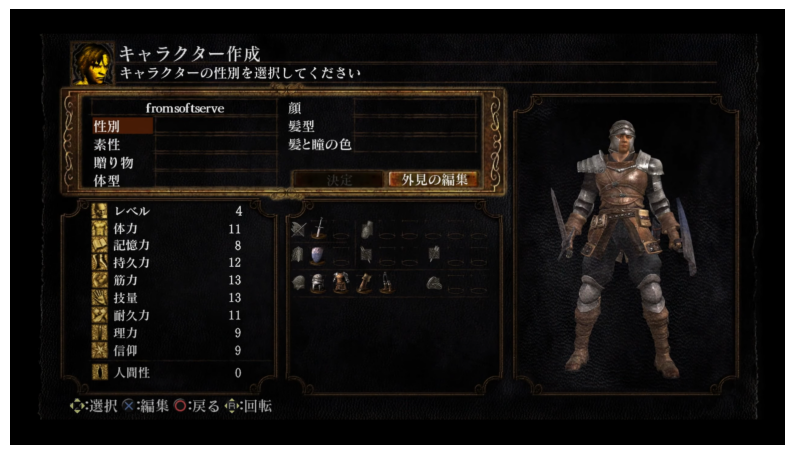

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(plt.imread(img_fns[3]))
ax.axis('off')
plt.show()

In [26]:
import easyocr

reader = easyocr.Reader(['ja'], gpu = True)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
C:\Users\Matheus\AppData\Local\Programs\Python\Python312\Lib\site-packages\easyocr\detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open 

In [27]:
results = reader.readtext(img_fns[3])

In [28]:
pd.DataFrame(results, columns=['bbox','text','conf'])

,bbox,text,conf
0,"[[265, 85], [625, 85], [625, 137], [265, 137]]",キャラクター作成,9.346536e-01
1,"[[266, 134], [876, 134], [876, 182], [266, 182]]",キャラクターの性別を選沢してください,3.896360e-01
2,"[[331, 230], [535, 230], [535, 262], [331, 262]]",{70ね:0ィィ:え「~^,3.441183e-08
3,"[[683, 225], [731, 225], [731, 267], [683, 267]]",顔,9.884035e-01
4,"[[203, 269], [277, 269], [277, 311], [203, 311]]",性別,9.259161e-01
5,"[[683, 269], [761, 269], [761, 311], [683, 311]]",髪型,7.595549e-01
6,"[[203, 315], [277, 315], [277, 357], [203, 357]]",素性,8.720501e-01
7,"[[683, 315], [851, 315], [851, 357], [683, 357]]",髪とクの色,2.014849e-01
8,"[[203, 358], [309, 358], [309, 402], [203, 402]]",噌り物,1.397090e-01
9,"[[201, 405], [277, 405], [277, 447], [201, 447]]",体型,9.824917e-01


In [19]:
def translate_text(text, dest_language='pt'):
    translator = GoogleTranslator(target=dest_language)
    translation = translator.translate(text)
    return translation

In [20]:
def textsize(text, font):
    im = Image.new(mode="P", size=(0, 0))
    draw = ImageDraw.Draw(im)
    _, _, width, height = draw.textbbox((0, 0), text=text, font=font)
    return width, height

In [43]:
def draw_rounded_rectangle(draw, xy, radius, fill):
    x0, y0, x1, y1 = xy
    draw.rectangle([x0 + radius, y0, x1 - radius, y1], fill=fill)
    draw.rectangle([x0, y0 + radius, x1, y1 - radius], fill=fill)
    draw.pieslice([x0, y0, x0 + 2 * radius, y0 + 2 * radius], 180, 270, fill=fill)
    draw.pieslice([x1 - 2 * radius, y0, x1, y0 + 2 * radius], 270, 360, fill=fill)
    draw.pieslice([x0, y1 - 2 * radius, x0 + 2 * radius, y1], 90, 180, fill=fill)
    draw.pieslice([x1 - 2 * radius, y1 - 2 * radius, x1, y1], 0, 90, fill=fill)


In [53]:
def add_overlay(bbox, translated_text):
    # Calcular largura e altura do bbox
    width = bbox[1][0] - bbox[0][0]
    height = bbox[2][1] - bbox[0][1]
    
    # Encontrar o ponto central do bbox
    center_x = bbox[0][0] + width / 2
    center_y = bbox[0][1] + height / 2
        
    # Configurar a fonte (ajustar o tamanho da fonte conforme necessário)
    font = ImageFont.truetype("arial.ttf", int(height * 0.8))  # Ajuste do tamanho da fonte
        
    text_width, text_height = textsize(translated_text, font)
    
    # Calcular a nova posição para centralizar o texto traduzido
    new_x = center_x - text_width / 2
    new_y = center_y - text_height / 2
    
    # Calcular a área do retângulo de fundo
    background_area = (new_x, new_y, new_x + text_width, new_y + text_height)
    
    # Desenhar o retângulo de fundo com 50% de opacidade
    #draw.rectangle(background_area, fill=(0, 0, 0, 128))  # Preto com 50% de opacidade
    draw_rounded_rectangle(draw, background_area, 4, fill=(0, 0, 0, 128))  # Preto com 50% de opacidade
    
    # Desenhar o texto traduzido na posição centralizada
    draw.text((new_x, new_y), translated_text, font=font, fill=(255, 255, 255, 255))  # Cor branca para visibilidade


In [54]:
    # Criar uma nova imagem (exemplo para o tamanho do frame do OBS)
    image = Image.new('RGBA', (1920, 1080), (0, 0, 0, 0))
    draw = ImageDraw.Draw(image)

In [55]:
for i in range(len(results)): 
    bbox = results[i][0]
    text = results[i][1]

    translated_text = translate_text(text)
    
    if translated_text is None:
        continue  # Vai para a próxima iteração do loop


    add_overlay(bbox, translated_text)

In [56]:
# Salvar ou enviar esta imagem para ser usada no OBS como sobreposição
image.save('overlay.png')